# <p style="background-color:red; font-family:calibri; color:white; font-size:120%; text-align:center;">Capstone Project | E-Commerce Product Delivery Prediction</p> 


# <p style="background-color:lightyellow; font-family:calibri; color:white; font-size:50%; text-align:center; color:red ">The aim of this project to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior.</p>


# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 1 | Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 2 | Read Dataset</p>

In [2]:
df = pd.read_csv("E_Commerce.csv")

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 3 | Data Preprocessing</p>

In [4]:
df.shape

(10999, 12)

In [5]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [6]:
# Check null/missing values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# Drop column
df = df.drop(['ID'], axis=1)

In [10]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 4 | Exploratory Data Analysis (EDA) </p>

# <p style="background-color:white; font-family:calibri; color:white; font-size:56%; text-align:center; color:red ">In The Exploratory Data Analysis, I Will Be Looking At The Relationship Between The Target Variable And The Other Variables. I Will Also Be Looking At The Distribution Of The Variables Across The Dataset, In Order To Understand The Data In A Better Way.</p>

### <b><span style='color:red'> Target Variable Distribution</span></b>  

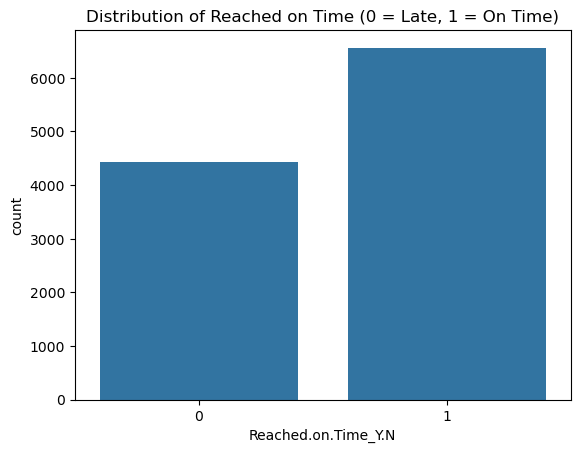

In [11]:
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Distribution of Reached on Time (0 = Late, 1 = On Time)')
plt.show()

The Data shows that the timely delivery of products is consistent across both genders, indicating that customer gender does not influence the punctuality of product delivery

### <b><span style='color:red'> Customer Gender Distribution</span></b>  

Text(0.5, 1.0, 'Gender Distribution')

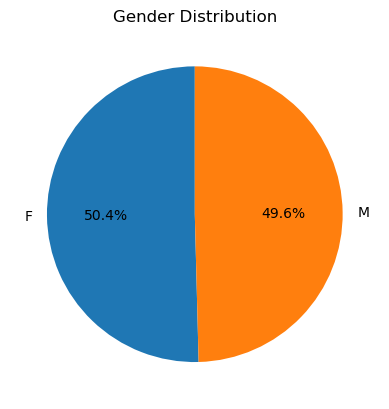

In [12]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

### <b><span style='color:red'> Product Properties</span></b>  

Text(0.5, 1.0, 'Cost of the Product')

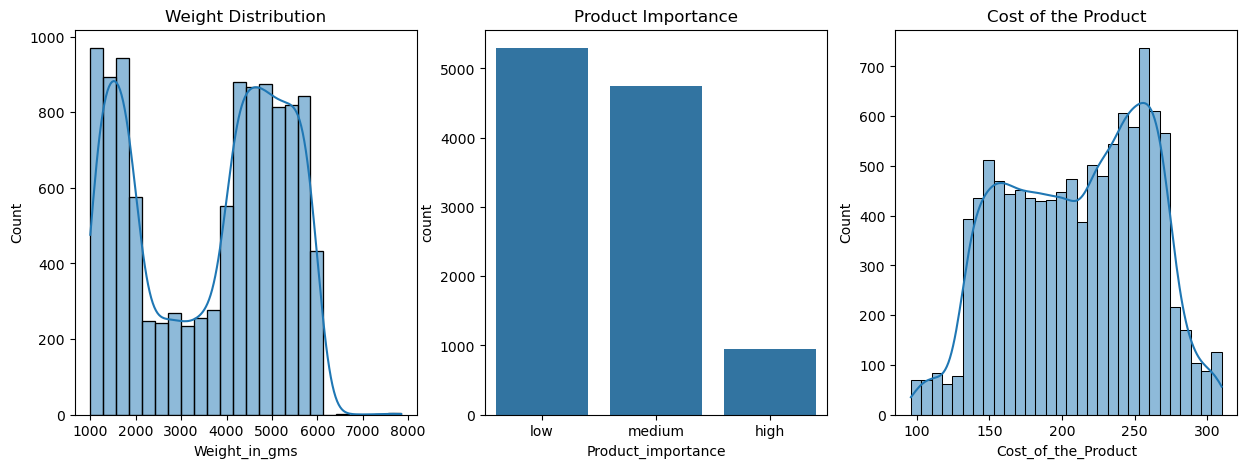

In [13]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

These three graphs explain the distribution of product properties - Weight, Cost and Importance in the dataset. Firstly, looking at the weight distribution, we can see that the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges. The second graph is about the product importance, where majority of the products have low or medium importance. The third graph is about the cost of the product. Third graph is about the cost distribution of the products, where there is increased distribution between 150-200 and 225-275 dollars.

From this, I conclude that majority of the products are lighter than 6000 grams, have low or medium importance and costs between 150-275 dollars.

### <b><span style='color:red'>Mode of Shipment vs Delivery on Time</span></b>  

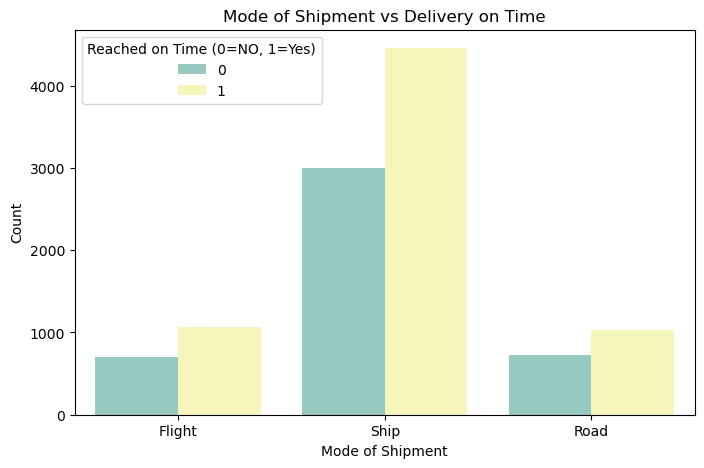

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette='Set3')
plt.title('Mode of Shipment vs Delivery on Time')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.legend(title='Reached on Time (0=NO, 1=Yes)')
plt.show()

### <b><span style='color:red'>Discount offered and its Relationship with delayed delivery</span></b>  

C:\Users\Daksh Rakholiya\AppData\Local\Temp\ipykernel_4820\3216924143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, palette='Set2')


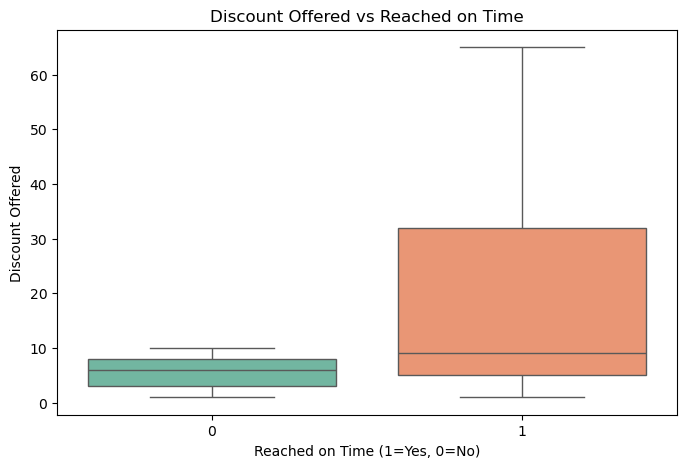

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, palette='Set2')
plt.title('Discount Offered vs Reached on Time')
plt.xlabel('Reached on Time (1=Yes, 0=No)')
plt.ylabel('Discount Offered')
plt.show()


### <b><span style='color:red'>Product importance vs delivery time</span></b>  

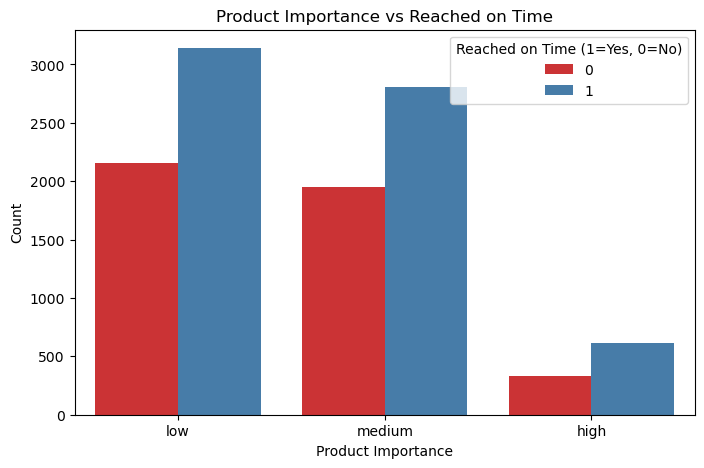

In [16]:
# Product importance vs delivery time
plt.figure(figsize=(8,5))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette='Set1')
plt.title('Product Importance vs Reached on Time')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Reached on Time (1=Yes, 0=No)')
plt.show()


### <b><span style='color:red'>Correlation Matrix</span></b>  

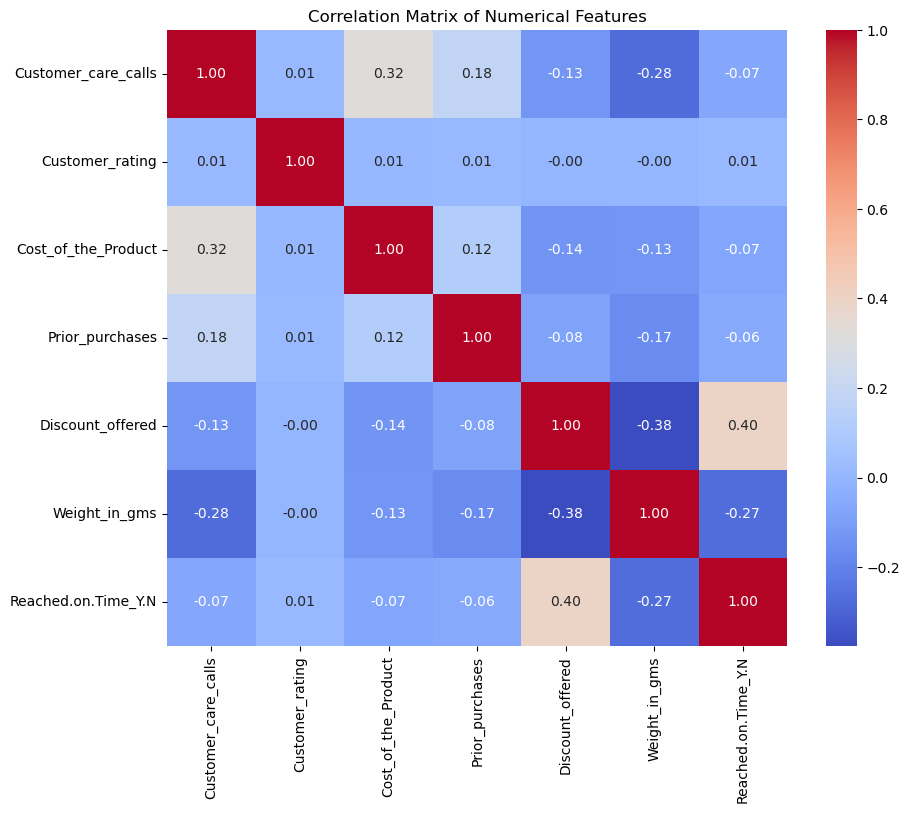

In [17]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix for numerical features
plt.figure(figsize=(10,8))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [18]:
# Drop column
df.drop(['Gender','Customer_care_calls', 'Product_importance'], axis=1 , inplace=True)

# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 5 | Feature Engineering</p>

In [19]:
# Label encoding categorical features
Label = LabelEncoder()

# Assuming 'Warehouse_block', 'Mode_of_Shipment' and 'Product_importance' are categorical
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment']

for col in categorical_cols:
    df[col] = Label.fit_transform(df[col])

df

,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,2,177,3,44,1233,1
1,4,0,5,216,2,59,3088,1
2,0,0,2,183,4,48,3374,1
3,1,0,3,176,4,10,1177,1
4,2,0,2,184,3,46,2484,1
...,...,...,...,...,...,...,...,...
10994,0,2,1,252,5,1,1538,1
10995,1,2,1,232,5,6,1247,0
10996,2,2,4,242,5,4,1155,0
10997,4,2,2,223,6,2,1210,0


In [20]:
# Split the data into features and target
X = df.drop(columns=['Reached.on.Time_Y.N'])  # Features
y = df['Reached.on.Time_Y.N']  # Target

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 6 | Model Selection</p>

## <b><span style='color:red'>-> Random Forest</span></b>  

In [22]:
# Train a Random Forest model
RFC = RandomForestClassifier(random_state=42)

# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [8, 10],                       # Tuning max depth of trees
    'min_samples_leaf': [2, 6],                 # Minimum number of samples per leaf
    'min_samples_split': [2,6, 8],              # Minimum samples needed to split a node
    'criterion': ['gini'],                      # Splitting criteria
    'n_estimators': [100, 200, 300]             # Number of trees in the forest
}

# GridSearchCV object
grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


#Fitting the model
RFC = grid.fit(X_train, y_train)

# Make predictions
RFC_pred = RFC.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, RFC_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.6977272727272728


## <b><span style='color:red'>-> Decision Tree Classifier</span></b>  

In [23]:
DTC = DecisionTreeClassifier()

# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],           # List of possible values for 'criterion'
    'max_depth': [5, 10, 15],                   # List of possible values for 'max_depth'
    'min_samples_split': [2, 10, 20],           # List of possible values for 'min_samples_split'
    'min_samples_leaf': [1, 5, 10],             # List of possible values for 'min_samples_leaf'
    'max_features': ['sqrt', 'log2', None]      # List of possible values for 'max_features'
}
#GridSearchCV object
grid = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
DTC = grid.fit(X_train, y_train)

# Make predictions
DTC_pred = DTC.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, DTC_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.685


## <b><span style='color:red'>-> Logistic Regression</span></b>  

In [24]:
# Instantiate the Logistic Regression model
LR = LogisticRegression()

# Parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],                   # Regularization type
    'C': [0.01, 0.1],                          # Regularization strength (inverse)
    'solver': ['liblinear', 'saga'],           # Algorithm for optimization
    'max_iter': [100, 200]                     # Maximum iterations
}

# GridSearchCV object
grid = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid.fit(X_train, y_train)

# Make predictions
LR_pred = grid.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, LR_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.6572727272727272


c:\Users\Daksh Rakholiya\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## <b><span style='color:red'>-> K-Nearest Neighbors </span></b>  

In [25]:
# Instantiate the KNN model
KNN = KNeighborsClassifier()

# Parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],                        # Number of neighbors to consider
    'weights': ['uniform', 'distance'],                 # Weight function ('uniform' or 'distance')
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2]                                         # Power parameter for Minkowski metric (1: Manhattan, 2: Euclidean)
}

# GridSearchCV object
grid = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid.fit(X_train, y_train)

# Make predictions
KNN_pred = grid.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, KNN_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.6504545454545455


## <b><span style='color:red'>-> XGBoost classifier</span></b>  

In [26]:
# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Parameter grid for tuning
param_grid = {
    'n_estimators': [200, 300],           # Number of trees
    'max_depth': [3, 6 ],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1],         # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],         # Proportion of samples used for training trees
    'colsample_bytree': [0.8],            # Proportion of features used for training each tree
    'gamma': [0.1, 0.2]                   # Minimum loss reduction required to make a further partition
}

# GridSearchCV object
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid.fit(X_train, y_train)

# Make predictions
XGB_pred = grid.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, XGB_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.6904545454545454


c:\Users\Daksh Rakholiya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 7 | Performance Evaluation Metrics</p>

In [27]:
# Evaluate the Random Forest Model
print("Random Fores Accuracy:", accuracy_score(y_test, RFC_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RFC_pred))
print("Classification Report:\n", classification_report(y_test, RFC_pred))

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, DTC_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, DTC_pred))
print("Classification Report:\n", classification_report(y_test, DTC_pred))

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, LR_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, LR_pred))
print("Classification Report:\n", classification_report(y_test, LR_pred))


# Evaluate the K-Nearest Neighbors model
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, KNN_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, KNN_pred))
print("Classification Report:\n", classification_report(y_test, KNN_pred))

# Evaluate the XGBoost classifier model
print("XGBoost classifier Accuracy:", accuracy_score(y_test, XGB_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, XGB_pred))
print("Classification Report:\n", classification_report(y_test, XGB_pred))

Random Fores Accuracy: 0.6977272727272728
Confusion Matrix:
 [[840  55]
 [610 695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.94      0.72       895
           1       0.93      0.53      0.68      1305

    accuracy                           0.70      2200
   macro avg       0.75      0.74      0.70      2200
weighted avg       0.79      0.70      0.69      2200

Decision Tree Accuracy: 0.685
Confusion Matrix:
 [[825  70]
 [623 682]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.92      0.70       895
           1       0.91      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.69      0.68      2200

Logistic Regression Accuracy: 0.6572727272727272
Confusion Matrix:
 [[506 389]
 [365 940]]
Classification Report:
               precision    

### <b><span style='color:red'> Model Comparison: Accuracy</span></b>  

C:\Users\Daksh Rakholiya\AppData\Local\Temp\ipykernel_4820\495476463.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='magma')  # Create the bar plot with specified color palette


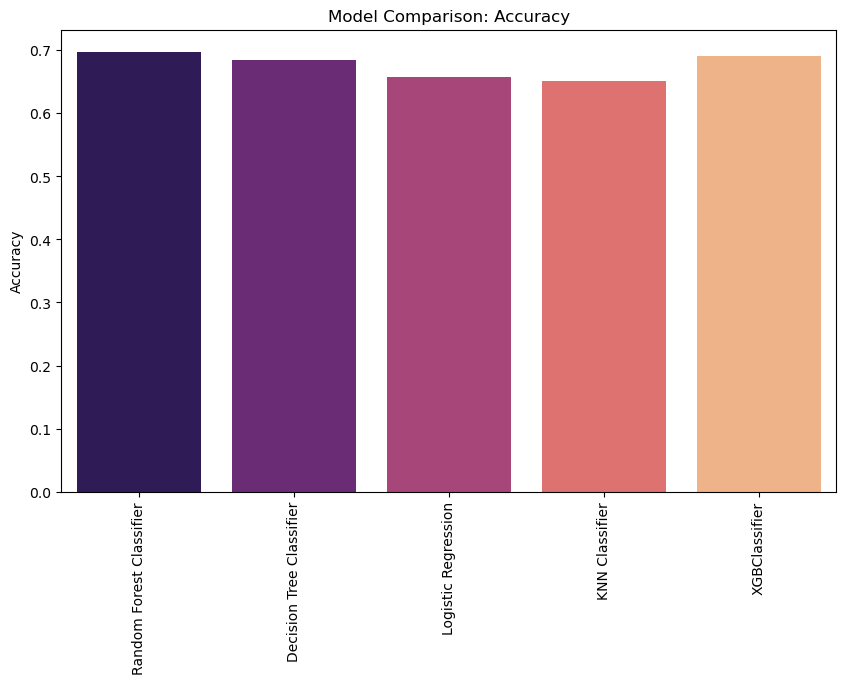

In [28]:
# List of model names for the x-axis
models = [
    'Random Forest Classifier', 
    'Decision Tree Classifier', 
    'Logistic Regression', 
    'KNN Classifier', 
    'XGBClassifier'
]

# List of corresponding accuracy scores for each model
accuracy = [
    accuracy_score(y_test, RFC_pred),   # Accuracy for Random Forest
    accuracy_score(y_test, DTC_pred),   # Accuracy for Decision Tree
    accuracy_score(y_test, LR_pred),    # Accuracy for Logistic Regression
    accuracy_score(y_test, KNN_pred),   # Accuracy for KNN
    accuracy_score(y_test, XGB_pred)    # Accuracy for XGBoost
]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=models, y=accuracy, palette='magma')  # Create the bar plot with specified color palette
plt.title('Model Comparison: Accuracy')  # Set the title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Accuracy')  # Set the y-axis label
plt.show()  # Display the plot


# <p style="background-color:Green; font-family:calibri; color:white; font-size:100%; text-align:center;">Step 8 | Save Model </p>

In [29]:
import pickle

# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(RFC, file)

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl
